# 1. Import Libraries

In [0]:
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing

#Lexicons
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

#Display every call in output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [0]:
reddit_corpus = pd.read_csv(os.path.join("data", "reddit_corpus_cleaned.csv"))

In [0]:
reddit_corpus.head(2)

,title,score,comms_num,time,body,en_titles,en_bodies,posts,word_len_posts,word_len_comms,word_len_en_titles,word_len_en_bodies,word_len_ro_titles,word_len_ro_bodies,posts_prep,posts_prep_lim,word_len_posts_lim,posts_pred_vader_score,posts_positive,date
0,protocol de tratament coronavirus RO,0,5,2020-03-17 05:20:49,NaN,the protocol for the treatment of a coronaviru...,NaN,the protocol for the treatment of a coronaviru...,9,109,9,0,5,0,protocol treatment coronavirus ro,"['protocol', 'treatment', 'coronavirus', 'ro']",4,0.0000,neutral,2020-03-17
1,Ce soluții credeți ca ar trebui implementate î...,0,1,2020-03-17 08:34:17,NaN,What do you think it would have to be implemen...,NaN,What do you think it would have to be implemen...,21,43,21,0,15,0,think would implement come period fight corona...,"['think', 'would', 'implement', 'come', 'perio...",7,-0.3818,negative,2020-03-17


# 2. Sentiment Analysis using Vader Lexicon

In [0]:
reddit_corpus['posts_pred_vader_score'] = reddit_corpus['posts'].apply(
    lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])
reddit_corpus[['posts', 'posts_pred_vader_score']] .head(2)
reddit_corpus['posts_pred_vader_score'].describe()

,posts,posts_pred_vader_score
0,the protocol for the treatment of a coronaviru...,0.0000
1,What do you think it would have to be implemen...,-0.3818


count    10771.000000
mean         0.015928
std          0.397849
min         -0.997400
25%         -0.077200
50%          0.000000
75%          0.226300
max          1.000000
Name: posts_pred_vader_score, dtype: float64

In [0]:
reddit_corpus.describe()

,score,comms_num,word_len_posts,word_len_comms,word_len_en_titles,word_len_en_bodies,word_len_ro_titles,word_len_ro_bodies,word_len_posts_lim,posts_pred_vader_score
count,10771.000000,10771.000000,10771.000000,10771.000000,10771.000000,10771.000000,10771.000000,10771.000000,10771.000000,10771.000000
mean,59.544146,20.222356,37.519543,661.544889,16.139727,18.513230,12.529477,18.513230,13.002228,0.015928
std,183.703664,47.763562,116.559803,1830.008099,12.896807,128.879553,10.071902,128.879553,37.772660,0.397849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997400
25%,1.000000,1.000000,7.000000,45.000000,6.000000,0.000000,5.000000,0.000000,3.000000,-0.077200
50%,5.000000,8.000000,15.000000,135.000000,13.000000,0.000000,10.000000,0.000000,6.000000,0.000000
75%,40.000000,23.000000,27.000000,586.500000,23.000000,0.000000,18.000000,0.000000,10.000000,0.226300
max,2878.000000,1098.000000,2559.000000,42389.000000,88.000000,7375.000000,69.000000,7375.000000,904.000000,1.000000


The sentiment scores vary from -0.998(most negative) to 1(most positive) with a mean of 0.016, hence overall we have a neutral sentiment for our dataset. 
Theory reveals that a positive sentiment has a compound score of >=0.05, while negative is <=-0.05. Everything in between can be considered neutral. (https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f)
All lexical ratings can be found at: https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt

# 3. Add a column to categorize the sentiments into positive, neutral and negative

In [0]:
# Add a new column for categorical data
positive = []
for score in reddit_corpus['posts_pred_vader_score']:
    if score >= 0.05:
        positive.append("positive")
    elif score <= -0.05:
        positive.append("negative")
    else:
        positive.append("neutral")

reddit_corpus['posts_positive']= positive
reddit_corpus.head(2)

,title,score,comms_num,time,body,en_titles,en_bodies,posts,word_len_posts,word_len_comms,word_len_en_titles,word_len_en_bodies,word_len_ro_titles,word_len_ro_bodies,posts_prep,posts_prep_lim,word_len_posts_lim,posts_pred_vader_score,posts_positive,date
0,protocol de tratament coronavirus RO,0,5,2020-03-17 05:20:49,NaN,the protocol for the treatment of a coronaviru...,NaN,the protocol for the treatment of a coronaviru...,9,109,9,0,5,0,protocol treatment coronavirus ro,"['protocol', 'treatment', 'coronavirus', 'ro']",4,0.0000,neutral,2020-03-17
1,Ce soluții credeți ca ar trebui implementate î...,0,1,2020-03-17 08:34:17,NaN,What do you think it would have to be implemen...,NaN,What do you think it would have to be implemen...,21,43,21,0,15,0,think would implement come period fight corona...,"['think', 'would', 'implement', 'come', 'perio...",7,-0.3818,negative,2020-03-17


Text(0.5, 1.0, 'Frequency of sentiments for Reddit posts')

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Frequency')

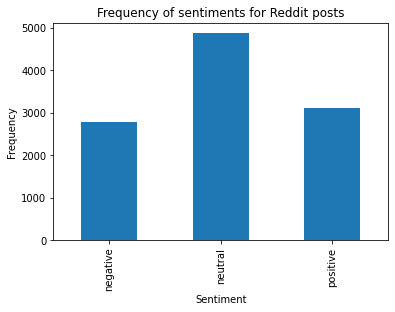

In [0]:
import matplotlib.pyplot as plt

fig = reddit_corpus['posts_positive'].value_counts().sort_index().plot(kind='bar')
fig.set_title('Frequency of sentiments for Reddit posts')
fig.set_xlabel('Sentiment')
fig.set_ylabel('Frequency')
plt.show()

In [0]:
# Save the corpus
reddit_corpus.to_csv(os.path.join("data", "reddit_corpus_cleaned.csv"), index=False)

# 4. Compute daily scores for Vader

In [0]:
# Get the date
reddit_corpus["date"] = reddit_corpus['time'].apply(lambda x: x[0:10])
reddit_corpus.head(2)

,title,score,comms_num,time,body,en_titles,en_bodies,posts,word_len_posts,word_len_comms,word_len_en_titles,word_len_en_bodies,word_len_ro_titles,word_len_ro_bodies,posts_prep,posts_prep_lim,word_len_posts_lim,posts_pred_vader_score,posts_positive,date
0,protocol de tratament coronavirus RO,0,5,2020-03-17 05:20:49,NaN,the protocol for the treatment of a coronaviru...,NaN,the protocol for the treatment of a coronaviru...,9,109,9,0,5,0,protocol treatment coronavirus ro,"['protocol', 'treatment', 'coronavirus', 'ro']",4,0.0000,neutral,2020-03-17
1,Ce soluții credeți ca ar trebui implementate î...,0,1,2020-03-17 08:34:17,NaN,What do you think it would have to be implemen...,NaN,What do you think it would have to be implemen...,21,43,21,0,15,0,think would implement come period fight corona...,"['think', 'would', 'implement', 'come', 'perio...",7,-0.3818,negative,2020-03-17


In [0]:
reddit_corpus["date"] = reddit_corpus['time'].apply(lambda x: x[0:10])

In [0]:
daily_corpus = reddit_corpus.groupby('date').mean()

In [0]:
daily_corpus= daily_corpus.reset_index()
daily_corpus.head(2)

,date,score,comms_num,word_len_posts,word_len_comms,word_len_en_titles,word_len_en_bodies,word_len_ro_titles,word_len_ro_bodies,word_len_posts_lim,posts_pred_vader_score
0,2020-03-16,78.006803,14.816327,24.925170,351.319728,14.877551,7.891156,11.653061,7.891156,8.700680,0.016828
1,2020-03-17,61.179245,18.146226,30.962264,512.132075,15.740566,12.495283,12.306604,12.495283,10.641509,0.051762


In [0]:
daily_corpus['date'] = pd.to_datetime(daily_corpus['date'], format='%Y-%m-%d')

# 5. Get the number of coronavirus infections and deaths declared in Romania per day

In [0]:
covid_cases = pd.read_csv('Covid_cases_per_day_Ro.csv')
covid_cases.head(2)
covid_cases.dtypes

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,5/13/2020,13,5,2020,190,30,Romania,RO,ROU,19473936,Europe
1,5/12/2020,12,5,2020,226,20,Romania,RO,ROU,19473936,Europe


dateRep                    object
day                         int64
month                       int64
year                        int64
cases                       int64
deaths                      int64
countriesAndTerritories    object
geoId                      object
countryterritoryCode       object
popData2018                 int64
continentExp               object
dtype: object

In [0]:
covid_cases['date'] = pd.to_datetime(covid_cases['dateRep'], format='%m/%d/%Y')

In [0]:
covid_cases.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,date
0,5/13/2020,13,5,2020,190,30,Romania,RO,ROU,19473936,Europe,2020-05-13
1,5/12/2020,12,5,2020,226,20,Romania,RO,ROU,19473936,Europe,2020-05-12


In [0]:
covid_cases = covid_cases.drop(columns = ["dateRep", "day", "month", "year", "countriesAndTerritories", "geoId", "countryterritoryCode", "continentExp"])

In [0]:
covid_cases.head(2)

,cases,deaths,popData2018,date
0,190,30,19473936,2020-05-13
1,226,20,19473936,2020-05-12


# 6. Merge the two dataframe into a single one

In [0]:
daily_corpus = pd.merge(daily_corpus, covid_cases, on="date")
daily_corpus.head(2)

,date,score,comms_num,word_len_posts,word_len_comms,word_len_en_titles,word_len_en_bodies,word_len_ro_titles,word_len_ro_bodies,word_len_posts_lim,posts_pred_vader_score,cases,deaths,popData2018
0,2020-03-16,78.006803,14.816327,24.925170,351.319728,14.877551,7.891156,11.653061,7.891156,8.700680,0.016828,26,0,19473936
1,2020-03-17,61.179245,18.146226,30.962264,512.132075,15.740566,12.495283,12.306604,12.495283,10.641509,0.051762,45,0,19473936


In [0]:
daily_corpus.set_index('date', inplace=True)

In [0]:
daily_corpus.head(2)

,score,comms_num,word_len_posts,word_len_comms,word_len_en_titles,word_len_en_bodies,word_len_ro_titles,word_len_ro_bodies,word_len_posts_lim,posts_pred_vader_score,cases,deaths,popData2018
date,,,,,,,,,,,,,
2020-03-16,78.006803,14.816327,24.925170,351.319728,14.877551,7.891156,11.653061,7.891156,8.700680,0.016828,26,0,19473936
2020-03-17,61.179245,18.146226,30.962264,512.132075,15.740566,12.495283,12.306604,12.495283,10.641509,0.051762,45,0,19473936


In [0]:
daily_corpus.corr()

,score,comms_num,word_len_posts,word_len_comms,word_len_en_titles,word_len_en_bodies,word_len_ro_titles,word_len_ro_bodies,word_len_posts_lim,posts_pred_vader_score,cases,deaths,popData2018
score,1.000000,0.275628,-0.064001,0.182677,-0.223013,-0.028140,-0.192207,-0.028140,-0.091980,0.331185,0.006781,0.100433,NaN
comms_num,0.275628,1.000000,0.424723,0.930867,0.235522,0.234851,0.237823,0.234851,0.413018,0.129588,0.143548,0.040647,NaN
word_len_posts,-0.064001,0.424723,1.000000,0.388932,0.195985,0.837398,0.172634,0.837398,0.994901,0.005330,0.246808,-0.042818,NaN
word_len_comms,0.182677,0.930867,0.388932,1.000000,0.287640,0.228569,0.306503,0.228569,0.383608,0.147597,0.258494,0.225429,NaN
word_len_en_titles,-0.223013,0.235522,0.195985,0.287640,1.000000,-0.037122,0.987054,-0.037122,0.225304,-0.035147,0.266895,0.220320,NaN
word_len_en_bodies,-0.028140,0.234851,0.837398,0.228569,-0.037122,1.000000,-0.071638,1.000000,0.819589,0.108231,0.193412,-0.014813,NaN
word_len_ro_titles,-0.192207,0.237823,0.172634,0.306503,0.987054,-0.071638,1.000000,-0.071638,0.203380,-0.043028,0.258695,0.235009,NaN
word_len_ro_bodies,-0.028140,0.234851,0.837398,0.228569,-0.037122,1.000000,-0.071638,1.000000,0.819589,0.108231,0.193412,-0.014813,NaN
word_len_posts_lim,-0.091980,0.413018,0.994901,0.383608,0.225304,0.819589,0.203380,0.819589,1.000000,0.005207,0.269617,-0.031803,NaN
posts_pred_vader_score,0.331185,0.129588,0.005330,0.147597,-0.035147,0.108231,-0.043028,0.108231,0.005207,1.000000,0.236940,0.185210,NaN


In [0]:
# Save the corpus in a csv
daily_corpus.to_csv(os.path.join("data", "reddit_corpus_cleaned_covid_cases.csv"))

# 7. Normalize the data

In [0]:
# Normalize the number of cases and deaths to be on the same scale as the vader sentiment score

x = daily_corpus.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
daily_corpus_norm = pd.DataFrame(x_scaled, index=daily_corpus.index, 
                                 columns=["score_norm", "comms_num_norm",
                                          "word_len_posts_norm", 
                                          "word_len_comms_norm",
                                          "word_len_en_titles_norm",
                                          "word_len_en_bodies_norm", 
                                          "word_len_ro_titles_norm",
                                          "word_len_ro_bodies_norm", 
                                          "word_len_posts_lim_norm", 
                                          "posts_pred_vader_score_norm", 
                                          "cases_norm", "deaths_norm",
                                          "popData2018_norm"])
daily_corpus_norm

,score_norm,comms_num_norm,word_len_posts_norm,word_len_comms_norm,word_len_en_titles_norm,word_len_en_bodies_norm,word_len_ro_titles_norm,word_len_ro_bodies_norm,word_len_posts_lim_norm,posts_pred_vader_score_norm,cases_norm,deaths_norm,popData2018_norm
date,,,,,,,,,,,,,
2020-03-16,0.821768,0.000000,0.103089,0.000000,0.302690,0.072993,0.348361,0.072993,0.089455,0.460494,0.017787,0.000000,0.0
2020-03-17,0.479603,0.161286,0.260032,0.176653,0.435789,0.172851,0.477369,0.172851,0.240127,0.680271,0.055336,0.000000,0.0
2020-03-18,0.426131,0.162116,0.315451,0.199271,0.301724,0.233725,0.326942,0.233725,0.303699,0.515784,0.031621,0.000000,0.0
2020-03-19,0.560243,0.319336,0.676282,0.325073,0.590869,0.440356,0.595834,0.440356,0.651696,0.370218,0.051383,0.000000,0.0
2020-03-20,0.395406,0.112805,0.281121,0.141529,0.346620,0.193993,0.343455,0.193993,0.293835,0.271161,0.000000,0.000000,0.0
2020-03-21,1.000000,0.422746,0.282238,0.287505,0.413329,0.186680,0.430589,0.186680,0.267466,0.443181,0.027668,0.000000,0.0
2020-03-22,0.316279,0.101494,0.212843,0.148605,0.074362,0.173113,0.101880,0.173113,0.186044,0.013641,0.083004,0.000000,0.0
2020-03-23,0.349685,0.419162,0.856201,0.377232,0.328617,0.581328,0.388904,0.581328,0.778064,0.069032,0.096838,0.047619,0.0
2020-03-24,0.417049,0.151612,0.216295,0.199716,0.478339,0.137475,0.522450,0.137475,0.231218,0.274063,0.249012,0.119048,0.0


# 8. Plot the results to check for trends

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


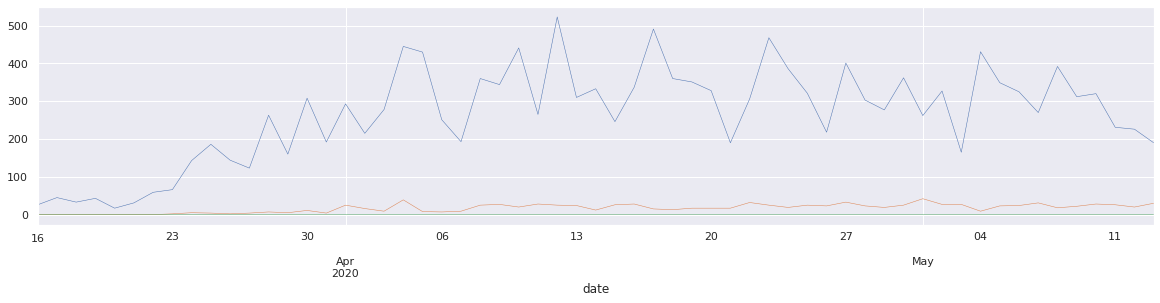

In [0]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 4)})
daily_corpus['cases'].plot(linewidth=0.5);
daily_corpus['deaths'].plot(linewidth=0.5);
daily_corpus['posts_pred_vader_score'].plot(linewidth=0.5);

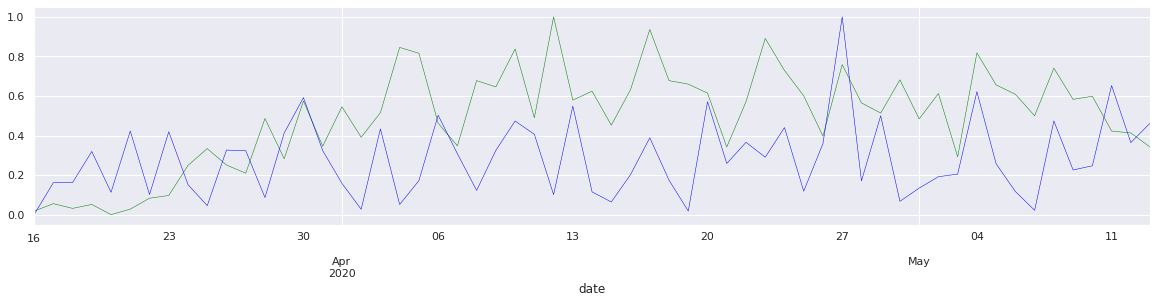

In [0]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 4)})
daily_corpus_norm['cases_norm'].plot(linewidth=0.5, color="green");
# daily_corpus_norm['deaths_norm'].plot(linewidth=0.5,  color="blue");
daily_corpus_norm['comms_num_norm'].plot(linewidth=0.5,  color="blue");
# daily_corpus_norm['posts_pred_vader_score_norm'].plot(linewidth=0.5, color="red");
# daily_corpus_norm['word_len_posts_norm'].plot(linewidth=0.5, color="red");

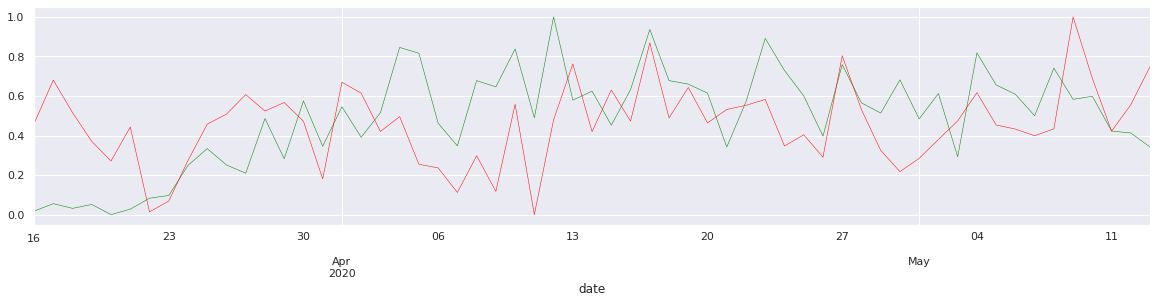

In [0]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 4)})
daily_corpus_norm['cases_norm'].plot(linewidth=0.5, color="green");
# daily_corpus_norm['deaths_norm'].plot(linewidth=0.5,  color="blue");
# daily_corpus_norm['comms_num_norm'].plot(linewidth=0.5,  color="blue");
daily_corpus_norm['posts_pred_vader_score_norm'].plot(linewidth=0.5, color="red");
# daily_corpus_norm['word_len_posts_norm'].plot(linewidth=0.5, color="red");

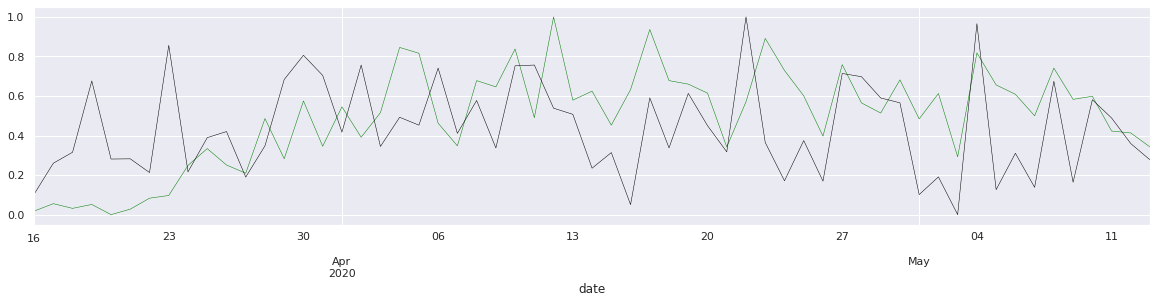

In [0]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 4)})
daily_corpus_norm['cases_norm'].plot(linewidth=0.5, color="green");
# daily_corpus_norm['deaths_norm'].plot(linewidth=0.5,  color="blue");
# daily_corpus_norm['comms_num_norm'].plot(linewidth=0.5,  color="blue");
# daily_corpus_norm['posts_pred_vader_score_norm'].plot(linewidth=0.5, color="red");
daily_corpus_norm['word_len_posts_norm'].plot(linewidth=0.5, color="black");

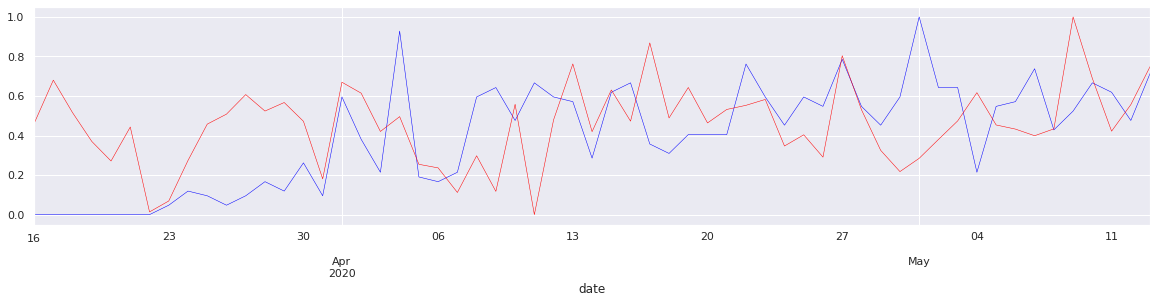

In [0]:
# # Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 4)})
# daily_corpus_norm['cases_norm'].plot(linewidth=0.5, color="green");
daily_corpus_norm['deaths_norm'].plot(linewidth=0.5,  color="blue");
# daily_corpus_norm['comms_num_norm'].plot(linewidth=0.5,  color="blue");
daily_corpus_norm['posts_pred_vader_score_norm'].plot(linewidth=0.5, color="red");
# daily_corpus_norm['word_len_posts_norm'].plot(linewidth=0.5, color="red");